- # *Outlier detection & treatment (winsorizing or removal with justification)*

-  ### We limited the analysis of outliers to these three variables because they represent the quantitative behavioral features of customers. As continuous variables, they are the most susceptible to statistical dispersion, which can skew the predictive model. The remaining columns are either categorical or time-bound, confined to a fixed range, and do not require outlier analysis

-  A comprehensive ****digital audit**** was performed on the entire dataset. Using the ****Interquartile Range (IQR) equation****, we successfully determined the precise number and percentage of outliers for each behavioral variable. This digital audit validated the visual observations in the ****box plots**** .

In [ ]:
# before
cols_to_check = ['order_number', 'add_to_cart_order', 'days_since_prior_order']

print("--- Digital Outlier Detection Report---")

for col in cols_to_check:
    Q1 = My_Data[col].quantile(0.25)
    Q3 = My_Data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = My_Data[(My_Data[col] < lower_bound) | (My_Data[col] > upper_bound)]
    count = outliers.shape[0]
    percentage = (count / len(My_Data)) * 100

    print(f"\nColomen: {col}")
    print(f"Max {upper_bound}")
    print(f"Number Of outliers: {count:,}")
    print(f"Percentage of outliers: {percentage:.2f}%")

--- Digital Outlier Detection Report---

Colomen: order_number
Max 52.5
Number Of outliers: 1,793,629
Percentage of outliers: 5.50%

Colomen: add_to_cart_order
Max 23.0
Number Of outliers: 1,357,124
Percentage of outliers: 4.16%

Colomen: days_since_prior_order
Max 29.0
Number Of outliers: 3,133,243
Percentage of outliers: 9.60%


-  This step was not merely a drawing, but an ****auditing process****; we proved numerically and visually that the outliers were not just random errors, but extreme values ​​representing a significant percentage (up to 5.5%), making the decision to address them using ****Winsorization**** a decision based on strong statistical evidence to ensure the model's stability later on.

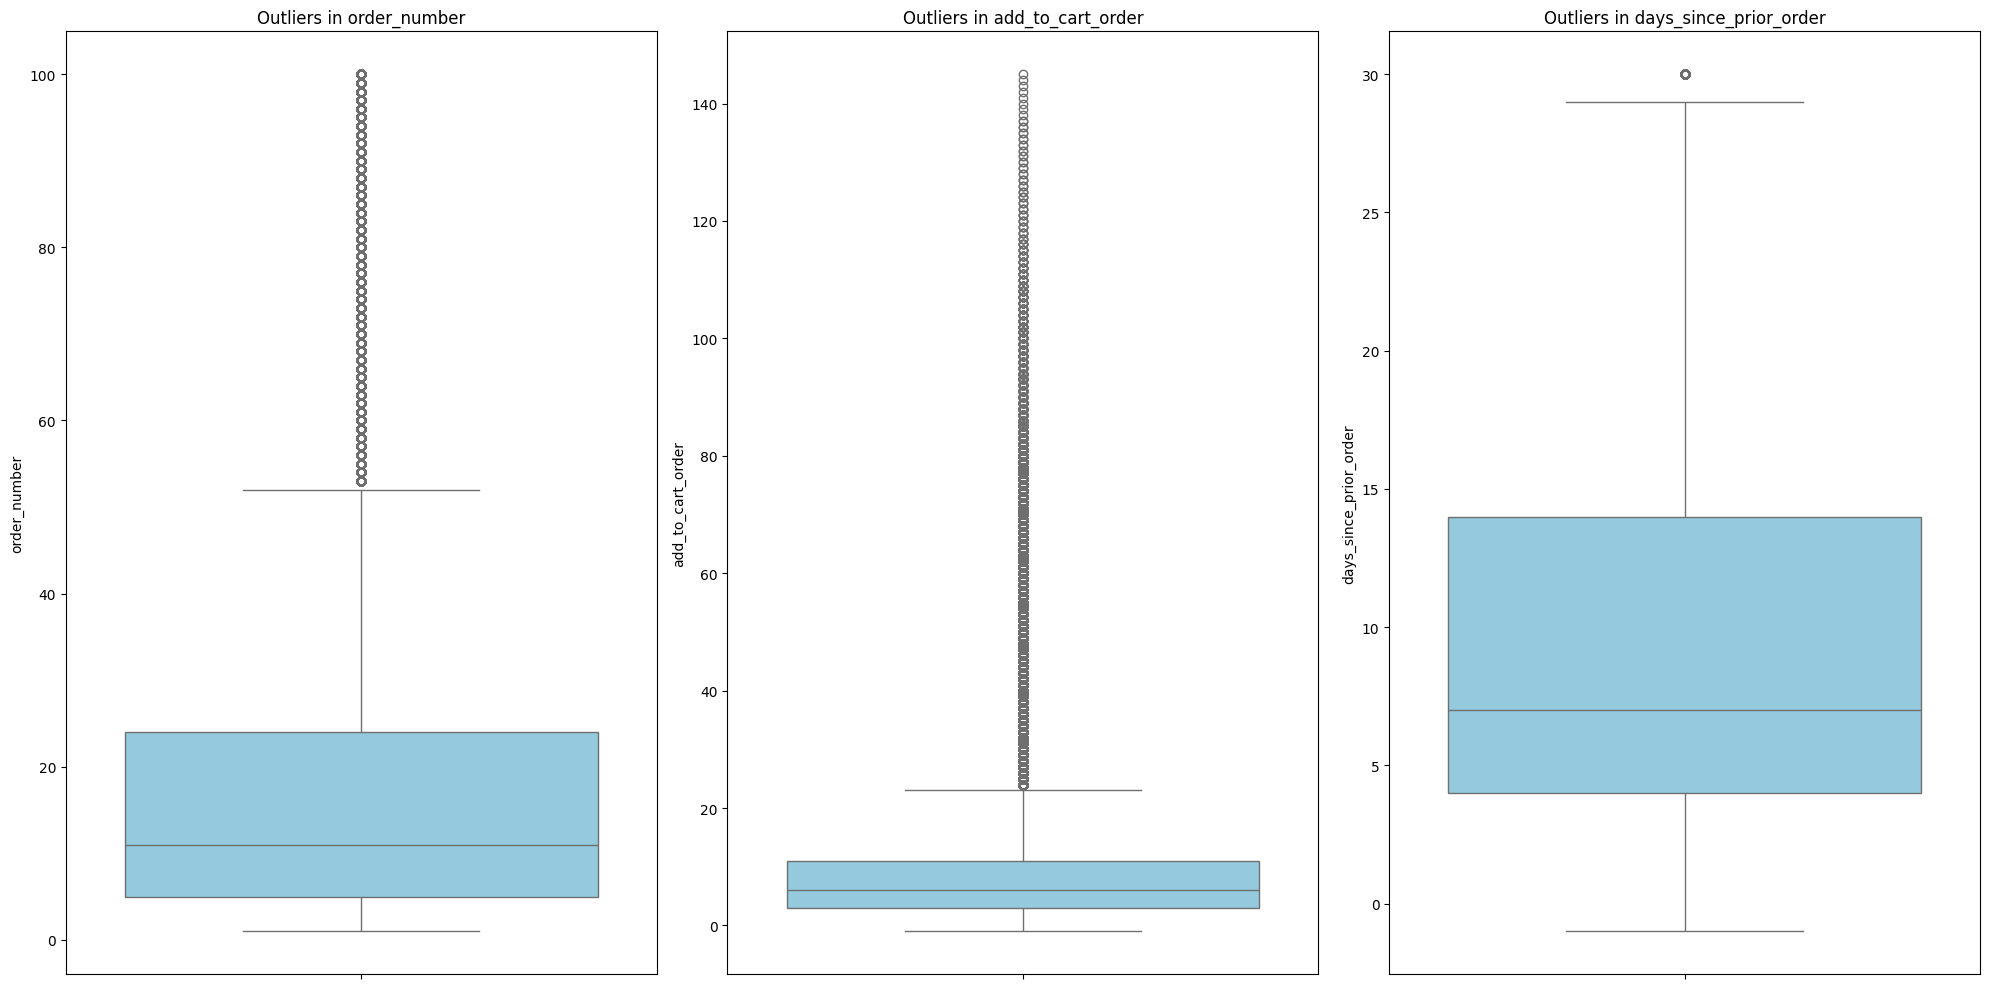

In [ ]:
cols_to_plot = ['order_number', 'add_to_cart_order', 'days_since_prior_order']

plt.figure(figsize=(20, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=My_Data[col], color='skyblue')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

-  We ruled out the removal option because we are dealing with a massive database, and deleting outliers would result in the loss of over 1.7 million records, potentially preventing the model from understanding the behavior of its most active customers. Instead, we opted for Winsorizing to address statistical outliers by restricting them to the 99th percentile. This decision ensures data integrity and provides a stable training environment for the predictive model without sacrificing sample size.

-  I experimented with the 99th and 95th percentiles and found that 0.95 was the most suitable for our project. This is because Instacart data exhibits very high dispersion in purchasing behavior, and the 95th percentile more closely aligns with the statistical IQR limits we previously calculated. This ensures a reduction in standard deviation and the fitting of more homogeneous features, which helps the algorithm learn more quickly and accurately.

In [ ]:
cols_to_fix = ['order_number', 'add_to_cart_order', 'days_since_prior_order']
for col in cols_to_fix:
    upper_limit = My_Data[col].quantile(0.95)
    My_Data[col] = np.where(My_Data[col] > upper_limit, upper_limit, My_Data[col])

    print(f"Done: {col} | New Max Limit: {upper_limit}")

Done: order_number | New Max Limit: 54.0
Done: add_to_cart_order | New Max Limit: 22.0
Done: days_since_prior_order | New Max Limit: 30.0


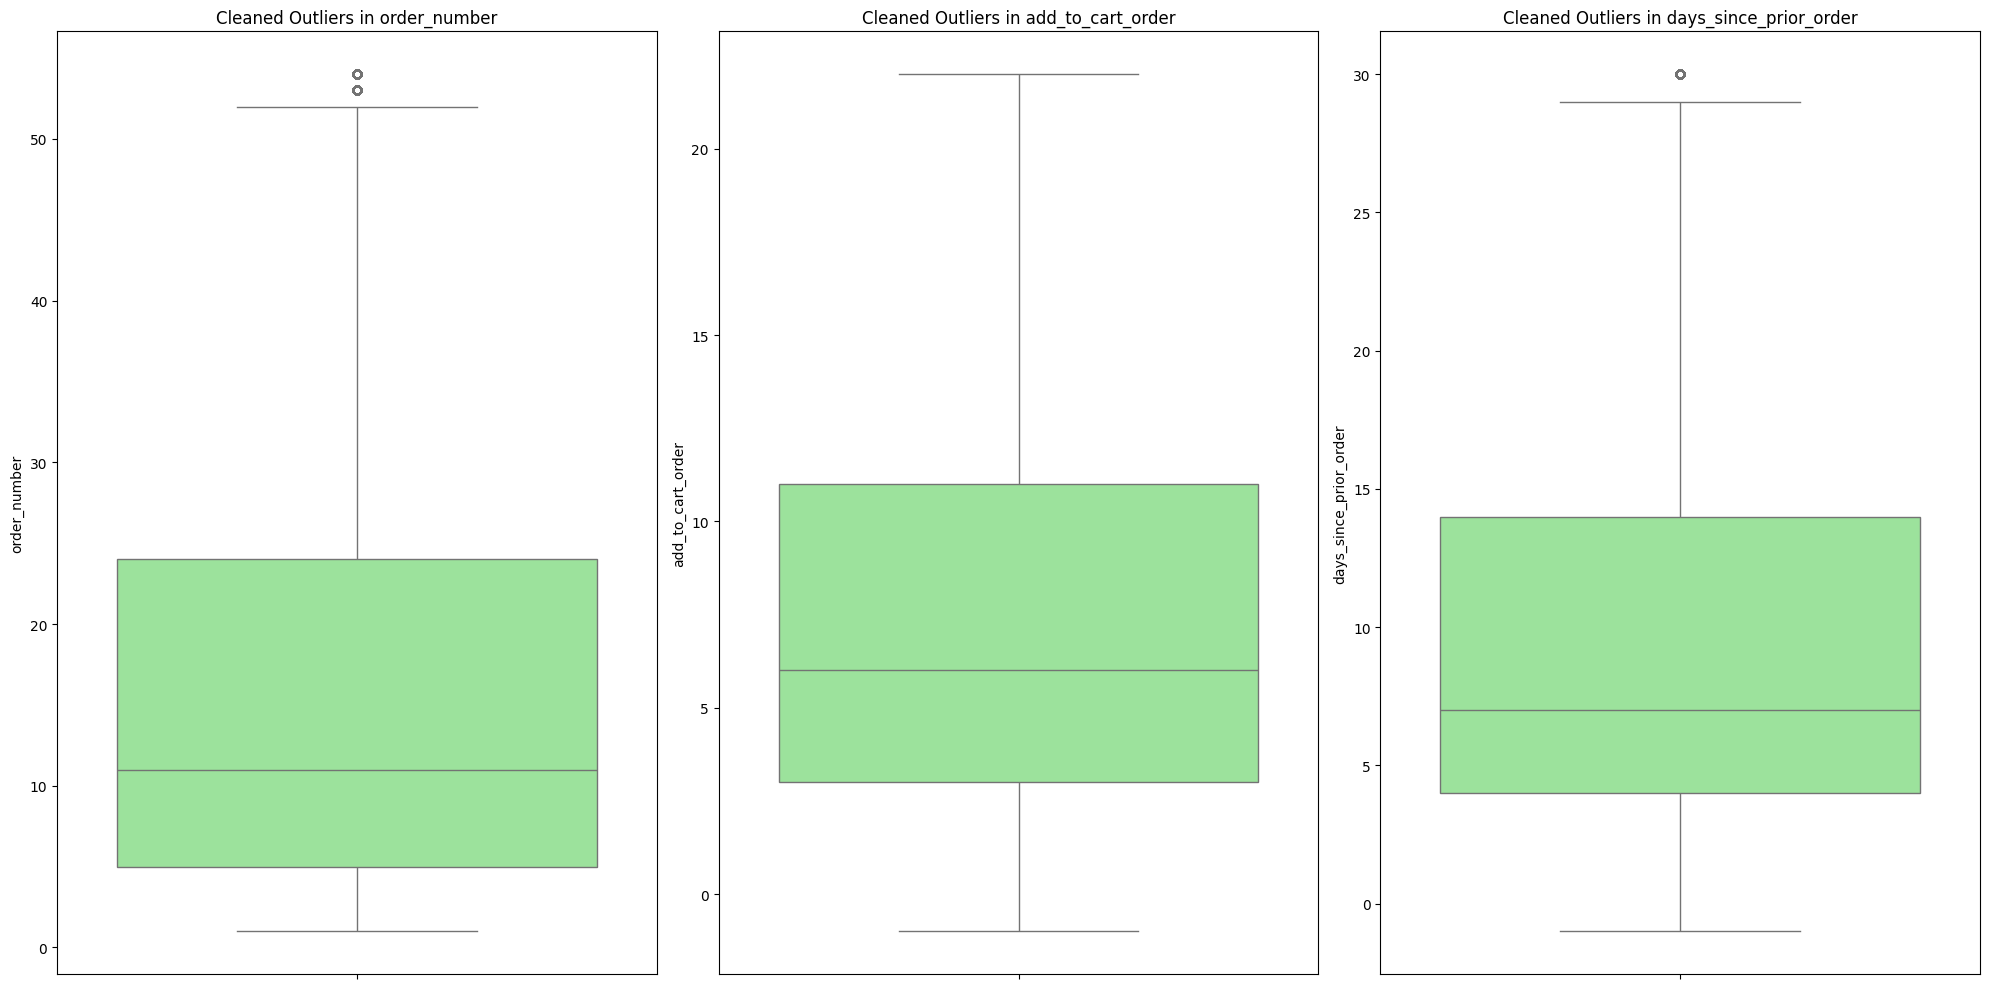

In [ ]:
cols_to_plot = ['order_number', 'add_to_cart_order', 'days_since_prior_order']

plt.figure(figsize=(20, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=My_Data[col], color='lightgreen')
    plt.title(f'Cleaned Outliers in {col}')

plt.tight_layout()
plt.show()